# [回帰：燃費を予測する](https://www.tensorflow.org/tutorials/keras/regression?hl=ja)

In [80]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Exploration

In [81]:
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

In [82]:
columns = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
dataset = pd.read_csv(dataset_path, names=columns, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

print(dataset.info())

dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB
None


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


# Feature Engineering

In [83]:
# Drop missing value rows

dataset = dataset.dropna(subset=['Horsepower'])

print(dataset.info())

dataset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB
None


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [84]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()
num_col = []

for col in dataset:
    if np.dtype(dataset[col]) == np.int64:
        dataset.loc[:,col] = encoder.fit_transform(dataset[col])
    else:
        num_col.append(col)

        
dataset.loc[:,num_col] = scaler.fit_transform(dataset[num_col])
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,-0.698638,4,1.077290,0.664133,0.620540,-1.285258,0,0
1,-1.083498,4,1.488732,1.574594,0.843334,-1.466724,0,0
2,-0.698638,4,1.182542,1.184397,0.540382,-1.648189,0,0
3,-0.955212,4,1.048584,1.184397,0.536845,-1.285258,0,0
4,-0.826925,4,1.029447,0.924265,0.555706,-1.829655,0,0


In [85]:
from sklearn.model_selection import train_test_split

y = dataset['MPG']
X = dataset.drop(['MPG'], axis=1)

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)

# Modeling

In [86]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=[len(X_tr.columns)]))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer=keras.optimizers.RMSprop(0.001), loss='mse', metrics=['mae', 'mse'])

In [89]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X, y, epochs=1000, validation_split=0.2, verbose=0, callbacks=[early_stop])

# Review result

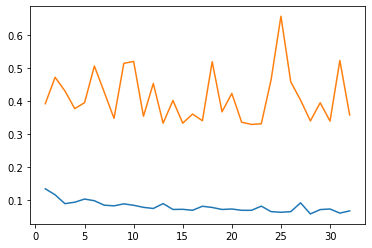

In [90]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)